In [232]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


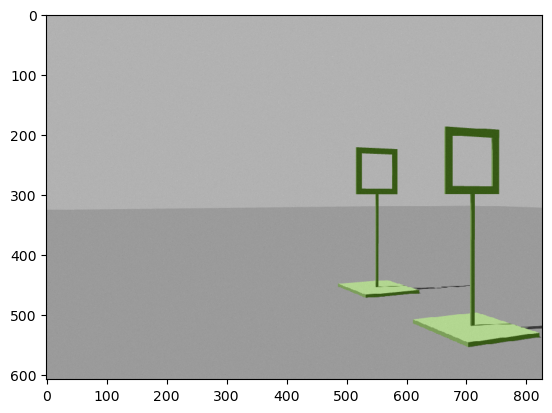

In [233]:
img = cv2.imread('images/image12.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

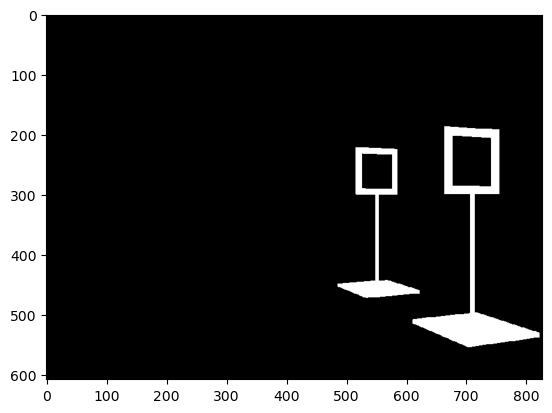

In [234]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
gates = cv2.inRange(img_hsv, (0, 20, 20), (179, 255, 255))
plt.imshow(gates, cmap='gray')
plt.show()

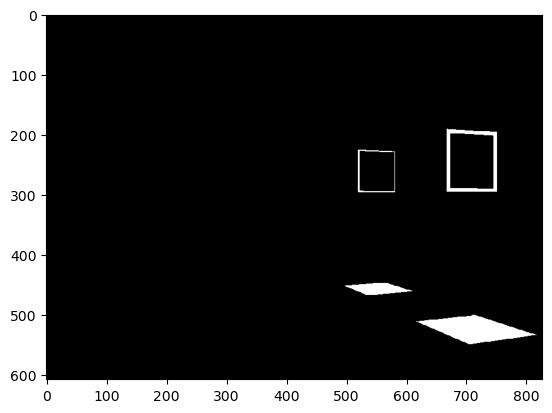

In [235]:
kernel = np.ones((3,3),np.uint8)
img_erosion = cv2.erode(gates ,kernel,iterations = 4)
plt.imshow(img_erosion, cmap='gray')
plt.show()

In [239]:
immm = img_erosion.copy()
ret,thresh = cv2.threshold(immm,100,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)
print("Number of objects detected:", len(contours))

def solidity(cnt):
   area = cv2.contourArea(cnt)
   hull = cv2.convexHull(cnt)
   hull_area = cv2.contourArea(hull)
   solidity = float(area)/hull_area
   return solidity

def eq_dia(cnt):
   area = cv2.contourArea(cnt)
   equi_diameter = np.sqrt(4*area/np.pi)
   return equi_diameter

for i, cnt in enumerate(contours):
   solid = solidity(cnt)
   solid= round(solid, 2)
   dia = eq_dia(cnt)
   dia =round(dia, 2)
   x,y,w,h = cv2.boundingRect(cnt)
   hull = cv2.convexHull(cnt)
   #immm = cv2.drawContours(immm,[hull],0,(0,255,255),6)
   #cv2.putText(immm, f'Solidity={solid}', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
   #cv2.putText(immm, f'Equivalent Diameter={dia}', (x, y+30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 0), 2)
   print(f"Solidity of object {i+1}: ", solid)
   print(f"Equivalent Diameter of object {i+1}: ", dia)


Number of objects detected: 4
Solidity of object 1:  0.94
Equivalent Diameter of object 1:  70.22
Solidity of object 2:  0.92
Equivalent Diameter of object 2:  31.33
Solidity of object 3:  0.99
Equivalent Diameter of object 3:  91.96
Solidity of object 4:  0.99
Equivalent Diameter of object 4:  97.59


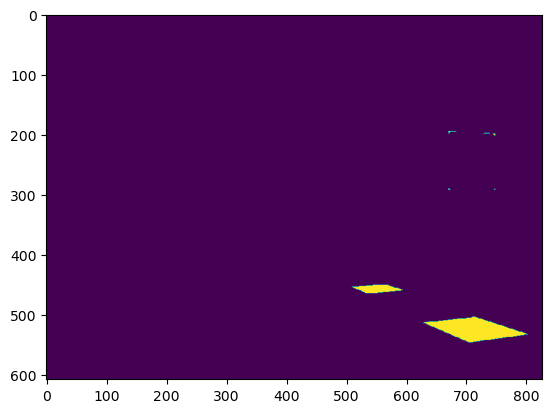

In [237]:
immm_copy = immm.copy()

cv2.drawContours(immm_copy, contours, -1, (0,255,0), 4)
plt.imshow(immm_copy)
plt.show()

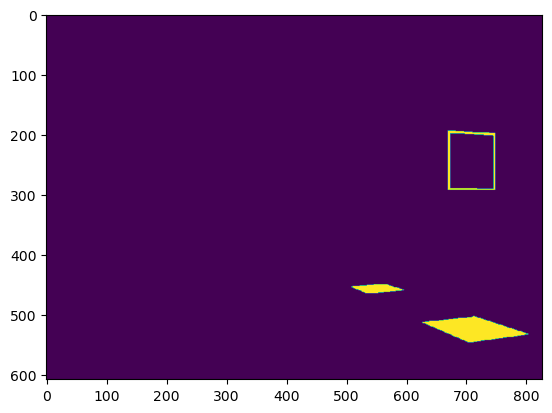

In [238]:
edged = cv2.Canny(img_erosion, 30, 200)
cv2.waitKey(0)
  
# Finding Contours
# Use a copy of the image e.g. edged.copy()
# since findContours alters the image
contours, hierarchy = cv2.findContours(edged, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cv2.drawContours(img_erosion, contours, -1, (0, 255, 0), 3)
plt.imshow(img_erosion)
plt.show()

